# CSE381 Introduction to Machine Learning – Spring 2023
**Project Description**

The data used in this project will help to identify whether a person is going to recover from
coronavirus symptoms or not based on some pre‐defined standard symptoms. These
symptoms are based on guidelines given by the World Health Organization (WHO).
This dataset has daily level information on the number of affected cases, deaths and
recovery from 2019 novel coronavirus. Please note that this is a time series data and so the
number of cases on any given day is the cumulative number

In [38]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,  PolynomialFeatures   
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#pip install tensorflow before importing
import tensorflow
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid


In [39]:
data= pd.read_csv(r"C:\Users\rana ahmed\Documents\GitHub\MachineLearning1\data.csv")
# Split the inputs and outputs into separate arrays
# x = data[ :, 0]
# y = data[:,1]
#training_data = data[:70]
feature_cols=['location',	'country' ,	'gender' ,	'age' ,	'vis_wuhan',	'from_wuhan',	'symptom1'	,'symptom2'	,'symptom3'	,'symptom4'	,'symptom5'	,'symptom6', 	'diff_sym_hos'
]
x=data[feature_cols]
y=data.result
# Convert 1-D arrays into 2-D because the commands later will require it
# x = np.expand_dims(x, axis=1)
# y = np.expand_dims(y, axis=1)
# Get 70% of the dataset as the training set. Put the remaining 30% in temporary variables: x_test and y_test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3)
# Split the 30% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=3)
#another approach to divide data 
#train, validate, test = np.split(df.sample(frac=1, random_state=42), #60 training 20 validation 20 test 
                      # [int(.6*len(df)), int(.8*len(df))]) 


In [40]:
data.describe()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,431.000000,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,249.270937,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,215.500000,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,431.000000,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,646.500000,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,862.000000,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [41]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(x_train) # returns the number of splitting iterations in the cross-validator
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)

In [43]:
#for train_index, test_index in kf.split(x_train):
 #X_train, X_test = x_train[train_index], x_test[test_index]
 #Y_train, Y_test = y_train[train_index], y_test[test_index]

In [44]:
model = SVC()
model.fit(x_train, y_train)
# print prediction results
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       115
           1       1.00      0.40      0.57        15

    accuracy                           0.93       130
   macro avg       0.96      0.70      0.77       130
weighted avg       0.94      0.93      0.92       130



1.Apply SVM classifier  Algorithm and tune hyperparameters

In [45]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.868 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [46]:
grid_predictions = grid.predict(x_test)
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       115
           1       1.00      0.60      0.75        15

    accuracy                           0.95       130
   macro avg       0.98      0.80      0.86       130
weighted avg       0.96      0.95      0.95       130



In [47]:
param_dist = {
          'rbf_svm__C': [1, 10, 100, 1000], 
          'rbf_svm__gamma': [0.001, 0.0001], 
          'rbf_svm__kernel': ['rbf', 'linear'],
}
# create pipeline with a scaler 
steps = [('scaler', StandardScaler()), ('rbf_svm', SVC())]
pipeline = Pipeline(steps)
# do search
search = RandomizedSearchCV(pipeline, 
param_distributions=param_dist, n_iter=50)
search.fit(x_train, y_train)

print(classification_report(y_test, predictions))

C:\Users\rana ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       115
           1       1.00      0.40      0.57        15

    accuracy                           0.93       130
   macro avg       0.96      0.70      0.77       130
weighted avg       0.94      0.93      0.92       130



In [48]:
# utils.plot_train_cv_test(x_train, y_train, x_cv, y_cv, x_test, y_test, title="input vs. target")

**MultiLayer**



In [49]:
# model = Sequential(
#     [               
#         tf.keras.Input(shape=(400,)),    #specify input size
#         ### START CODE HERE ### 
#         Dense(units=25, activation='relu'), Dense(units=15, activation='relu'), Dense(units=1, activation='sigmoid')
        
        
#         ### END CODE HERE ### 
#     ], name = "my_model" 
# )                            


In [50]:
# Add polynomial features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

C:\Users\rana ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


**KNN**

supervised learning algorithm 


We will try to predict using the cross-validation dataset and calculate the accuracy between the expected output and the original output by random number of neighbors 

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[113   2]
 [ 11   4]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       115
           1       0.67      0.27      0.38        15

    accuracy                           0.90       130
   macro avg       0.79      0.62      0.66       130
weighted avg       0.88      0.90      0.88       130



In [52]:


# acc=np.zeros(20)
# #compare with validation data set to make sure of it
# # matrix=confusion_matrix(y_cv,y_prediction)
# # print(matrix)
# scaler = preprocessing.StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# for i in range(1,21):
#     #Train Model and Predict  
#     knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
#     yhat= knn.predict(x_cv)
#     acc[i-1] = metrics.accuracy_score(y_cv, yhat)

# acc

we define a range of k values from 1 to 30, and we use 10-fold cross-validation to evaluate the accuracy of the model for each value of k. We store the cross-validation scores in a list, and we find the optimal k by selecting the value that gives the highest cross-validation score.

In [53]:
from sklearn.model_selection import cross_val_score
neighbors=[]
k_range=range(1,31)
cv_scores=[]
for k in k_range:
    neighbors.append(k)
    knn2=KNeighborsClassifier ( n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    

scores=cross_val_score(knn2,x_train,y_train,cv=10, scoring='accuracy')
print(scores)

[0.86885246 0.8852459  0.86885246 0.8852459  0.88333333 0.88333333
 0.88333333 0.88333333 0.88333333 0.86666667]


In [54]:
optimal_k=k_range[np.argmax(cv_scores)]
print(f" The optimal number of neigbors is {optimal_k} ")

 The optimal number of neigbors is 1 


Also we tried to determine the best k using the MeanSquared Error by finding the k that gives the minimum MSE

1


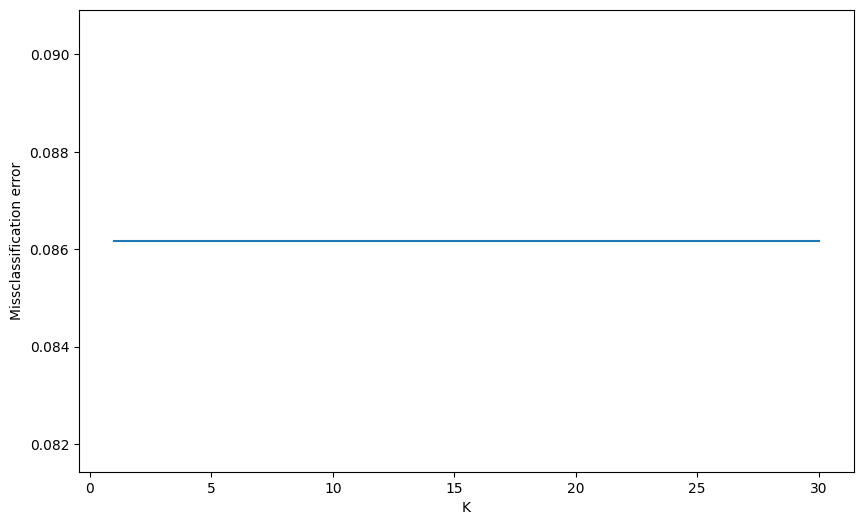

In [55]:

MSE=[1-x for x in cv_scores]

optimal_k =neighbors[MSE.index(min(MSE))]
print(optimal_k)
plt.figure(figsize=(10,6))
plt.plot(neighbors,MSE)
plt.xlabel("K")
plt.ylabel("Missclassification error")
plt.show()

Maximum accuracy:- 0.9538461538461539 at K = 0


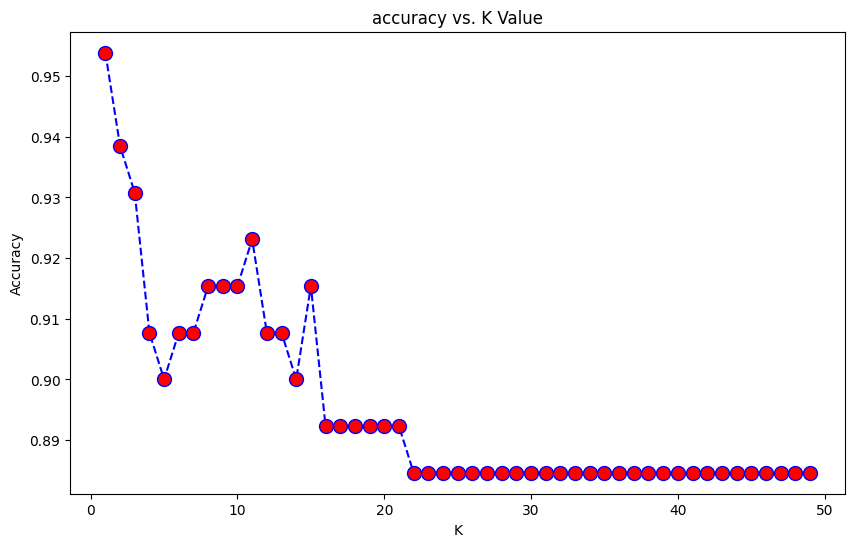

In [62]:
acc = []
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [56]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'brute')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[114   1]
 [  5  10]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       115
           1       0.91      0.67      0.77        15

    accuracy                           0.95       130
   macro avg       0.93      0.83      0.87       130
weighted avg       0.95      0.95      0.95       130



Tunning hyperparameter k

In [57]:
knn3 = KNeighborsClassifier()

# Set the hyperparameters to tune over
param_grid = {'n_neighbors': [3, 5, 7, 9, 11,13,15,17,19,21,23], 'weights': ['uniform', 'distance'], 'metric' : ['minkowski','euclidean','manhattan']}

# Create a grid search object to find the best hyperparameters
grid_search = GridSearchCV(knn3, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test data
print("Test set accuracy:", grid_search.score(x_test, y_test))

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Test set accuracy: 0.9384615384615385
